In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Preprocessing 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Models 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

# Evaluation Metrics and Model Selection
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Warnings
import warnings
warnings.filterwarnings("ignore")

## Dataset Initial Analysis
1. Read Data
2. Data Shape
3. Data Info
4. Description (num and obj)
5. Skewness and Kurtosis
6. Duplicate Check
7. Null Values

In [2]:
# Read CSV
df = pd.read_csv("CSI_6_ARI_CW_23_24_22.csv")

# Data Shape
print(f"Data Shape: {df.shape}")
print(f"Data Samples Number: {df.shape[0]}")
print(f"Data Features Number: {df.shape[1]}")

df

Data Shape: (30000, 25)
Data Samples Number: 30000
Data Features Number: 25


,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98891881,0,good,Ordinary,good,good,manageable,need improvement,good,excellent,...,excellent,need improvement,Female,Loyal Customer,38.0,Personal Travel,Eco,1426,42.0,29.0
1,98863280,0,need improvement,Green Car,acceptable,acceptable,manageable,excellent,good,acceptable,...,need improvement,acceptable,Female,Loyal Customer,56.0,Business travel,Eco,343,0.0,0.0
2,98833067,1,good,Ordinary,good,NaN,manageable,excellent,good,excellent,...,acceptable,excellent,Male,Loyal Customer,26.0,Personal Travel,Eco,1092,1.0,0.0
3,98868490,1,need improvement,Ordinary,need improvement,NaN,need improvement,excellent,acceptable,poor,...,good,poor,Male,Loyal Customer,38.0,NaN,Business,818,17.0,0.0
4,98808832,1,acceptable,Green Car,acceptable,acceptable,manageable,excellent,good,excellent,...,acceptable,good,Male,Loyal Customer,46.0,Business travel,Business,2114,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,98886048,1,acceptable,Ordinary,acceptable,NaN,manageable,acceptable,good,excellent,...,excellent,acceptable,Female,Loyal Customer,16.0,Personal Travel,Eco,1836,3.0,0.0
29996,98832592,1,need improvement,Green Car,need improvement,poor,need improvement,poor,good,good,...,need improvement,good,Female,Loyal Customer,33.0,Personal Travel,Eco,4267,0.0,12.0
29997,98888232,1,acceptable,Green Car,need improvement,need improvement,Inconvinient,excellent,need improvement,acceptable,...,good,excellent,Male,NaN,38.0,Business travel,Business,1612,0.0,0.0
29998,98806869,0,acceptable,Green Car,good,acceptable,need improvement,acceptable,acceptable,acceptable,...,good,acceptable,Male,Loyal Customer,54.0,Personal Travel,Eco,1748,0.0,13.0


In [3]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       30000 non-null  int64  
 1   Overall_Experience       30000 non-null  int64  
 2   Seat_comfort             29979 non-null  object 
 3   Seat_Class               30000 non-null  object 
 4   Arrival_time_convenient  27166 non-null  object 
 5   Catering                 27262 non-null  object 
 6   Platform_location        29989 non-null  object 
 7   Onboardwifi_service      29989 non-null  object 
 8   Onboard_entertainment    29995 non-null  object 
 9   Online_support           29970 non-null  object 
 10  Onlinebooking_Ease       29975 non-null  object 
 11  Onboard_service          27607 non-null  object 
 12  Leg_room                 29979 non-null  object 
 13  Baggage_handling         29955 non-null  object 
 14  Checkin_service       

In [4]:
# Data Description only for Numeric dtype
# Drop ID as it meant to be uniques val for each row
numeric_df = df.drop(columns=['ID']).select_dtypes(include='number')
numeric_df.describe()

,Overall_Experience,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
count,30000.000000,29991.000000,30000.000000,29981.000000,29884.000000
mean,0.544133,39.289287,1979.276467,14.676095,14.992170
std,0.498057,15.017782,1029.337366,38.229070,38.409975
min,0.000000,7.000000,50.000000,0.000000,0.000000
25%,0.000000,27.000000,1359.000000,0.000000,0.000000
50%,1.000000,40.000000,1925.500000,0.000000,0.000000
75%,1.000000,51.000000,2532.000000,12.000000,13.000000
max,1.000000,85.000000,6950.000000,1592.000000,1584.000000


In [5]:
# Calculate skewness
skewness = numeric_df.skew()
# Calculate kurtosis
kurt = numeric_df.kurtosis()

print(f"Skewness: \n{skewness}")
print(f"\nKurtosis: \n{kurt}")

Skewness: 
Overall_Experience       -0.177234
Age                      -0.002798
Travel_Distance           0.475999
DepartureDelay_in_Mins    7.711648
ArrivalDelay_in_Mins      7.572696
dtype: float64

Kurtosis: 
Overall_Experience         -1.968719
Age                        -0.700465
Travel_Distance             0.375711
DepartureDelay_in_Mins    148.839705
ArrivalDelay_in_Mins      143.341437
dtype: float64


In [6]:
# Data Description for Object dtypes
df.describe(include='object')

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,TypeTravel,Travel_Class
count,29979,30000,27166,27262,29989,29989,29995,29970,29975,27607,29979,29955,29970,29996,29996,29972,27144,27173,30000
unique,6,2,6,6,5,6,6,5,6,6,6,5,5,6,6,2,2,2,2
top,need improvement,Green Car,good,acceptable,manageable,good,good,good,good,good,good,good,good,good,good,Female,Loyal Customer,Business travel,Eco
freq,6746,15038,6187,5959,7770,7240,9590,9537,9184,8742,9216,11150,8473,11312,8056,15149,22120,18738,15747


In [7]:
# Variable definitions
dupl_rows = df.duplicated().sum()
dupl_ids = df["ID"].duplicated().sum()

# Check Duplicate Rows
print(f"Duplicate Rows: {dupl_rows}")

# Check Duplicate IDs
print(f"Duplicate Rows: {dupl_ids}")

Duplicate Rows: 0
Duplicate Rows: 0


In [8]:
# NaN
nan_counts = df.isna().sum()
# Null 
null_counts = df.isnull().sum()
# Empty
empty_counts = (df=='').sum()

# NaN == Null
nan_null_align = (nan_counts == null_counts).all()
# No Empty
all_empty_zero = (empty_counts == 0).all()

if nan_null_align and all_empty_zero:
    print("All NaN and Null values align, and all empty counts are zero.")
else:
    print("There are inconsistencies in the NaN, Null, or empty counts.")

All NaN and Null values align, and all empty counts are zero.


In [9]:
# Cols With Null Values Initialisation
total_null_cols = 0

# Missing Values
for col in df:
    if df[col].isnull().sum() > 0:
        null_col = df[col].isnull().sum()
        total_null_cols += 1
        print(f"Feature \033[1m'{col}'\033[0;0m has \033[1m{null_col}\033[0;0m null values")
        
# Total Number of Cols with Nulls Values
print(f"\nThere are {total_null_cols} features with null values")

Feature 'Seat_comfort' has 21 null values
Feature 'Arrival_time_convenient' has 2834 null values
Feature 'Catering' has 2738 null values
Feature 'Platform_location' has 11 null values
Feature 'Onboardwifi_service' has 11 null values
Feature 'Onboard_entertainment' has 5 null values
Feature 'Online_support' has 30 null values
Feature 'Onlinebooking_Ease' has 25 null values
Feature 'Onboard_service' has 2393 null values
Feature 'Leg_room' has 21 null values
Feature 'Baggage_handling' has 45 null values
Feature 'Checkin_service' has 30 null values
Feature 'Cleanliness' has 4 null values
Feature 'Online_boarding' has 4 null values
Feature 'Gender' has 28 null values
Feature 'CustomerType' has 2856 null values
Feature 'Age' has 9 null values
Feature 'TypeTravel' has 2827 null values
Feature 'DepartureDelay_in_Mins' has 19 null values
Feature 'ArrivalDelay_in_Mins' has 116 null values

There are 20 features with null values


## Exploratory Analysis
1. Target Distribution and Percentage of Classes
2. Histograms for Balanced Classes Outliers
3. Boxplots for Numerical Features Outliers
4. Correlation of Attributes


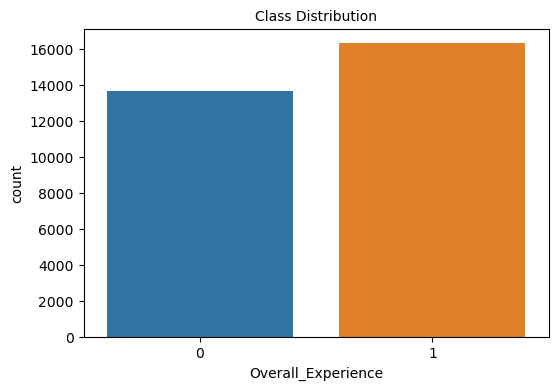

Distinct Count of Overall Experience: 
1    16324
0    13676
Name: Overall_Experience, dtype: int64


Percentage of each class on total samples: 
1    54.4
0    45.6
Name: Overall_Experience, dtype: float64


In [10]:
# Check Classes Count and Visualisation
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df, x='Overall_Experience')
ax.set_title('Class Distribution', fontsize=10)
plt.show()

# Total Counts of each Class
class_counts = df['Overall_Experience'].value_counts()
# Calculate the total number of samples
total_samples = len(df)
# Calculate the percentage of each class relative to the total
percentage_of_classes = round((class_counts / total_samples) * 100, 1)

print(f"Distinct Count of Overall Experience: \n{class_counts}\n\n")
print(f"Percentage of each class on total samples: \n{percentage_of_classes}")

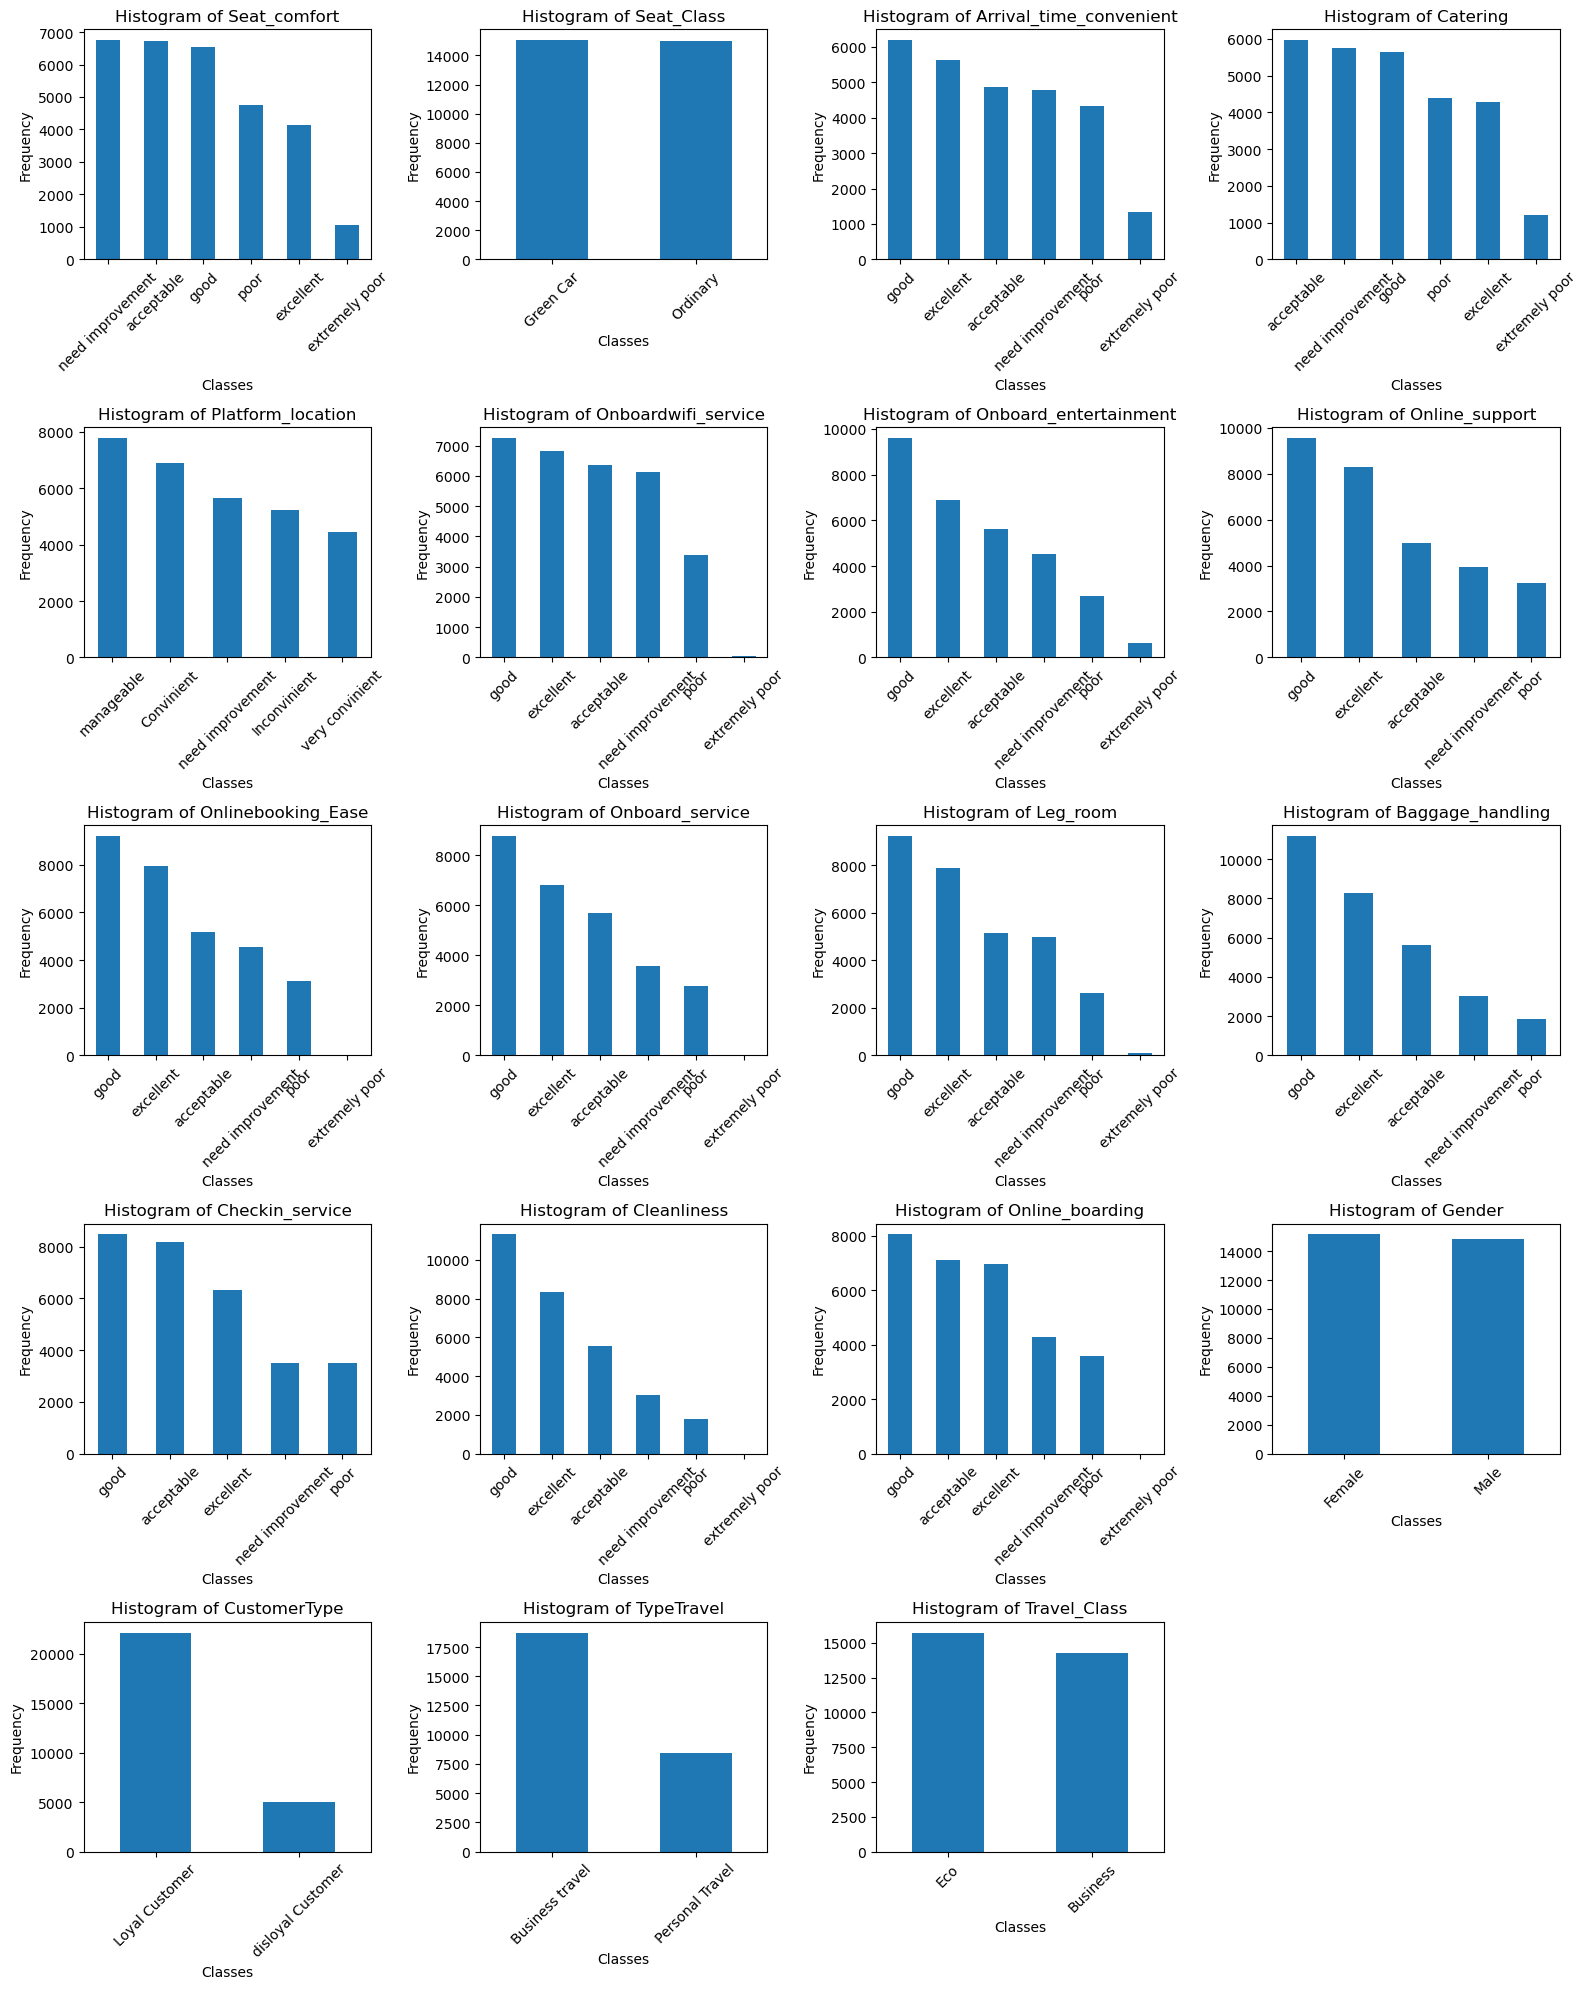

In [11]:
# Select Balanced Features
object_df = df.select_dtypes(include=['object'])

# Cols and Rows
num_cols = 4
num_rows = (len(object_df.columns) + num_cols - 1) // num_cols

# Create Subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows*4))

# Flatten Axes
if num_rows > 1:
    axes = axes.flatten()

# Plot Hstograms for each Col
for i, column in enumerate(object_df.columns):
    ax = axes[i]
    object_df[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Classes')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45)

# Remove Last Empty
if len(object_df.columns) % num_cols != 0:
    fig.delaxes(axes[-1])

# Display
plt.tight_layout()
plt.show()

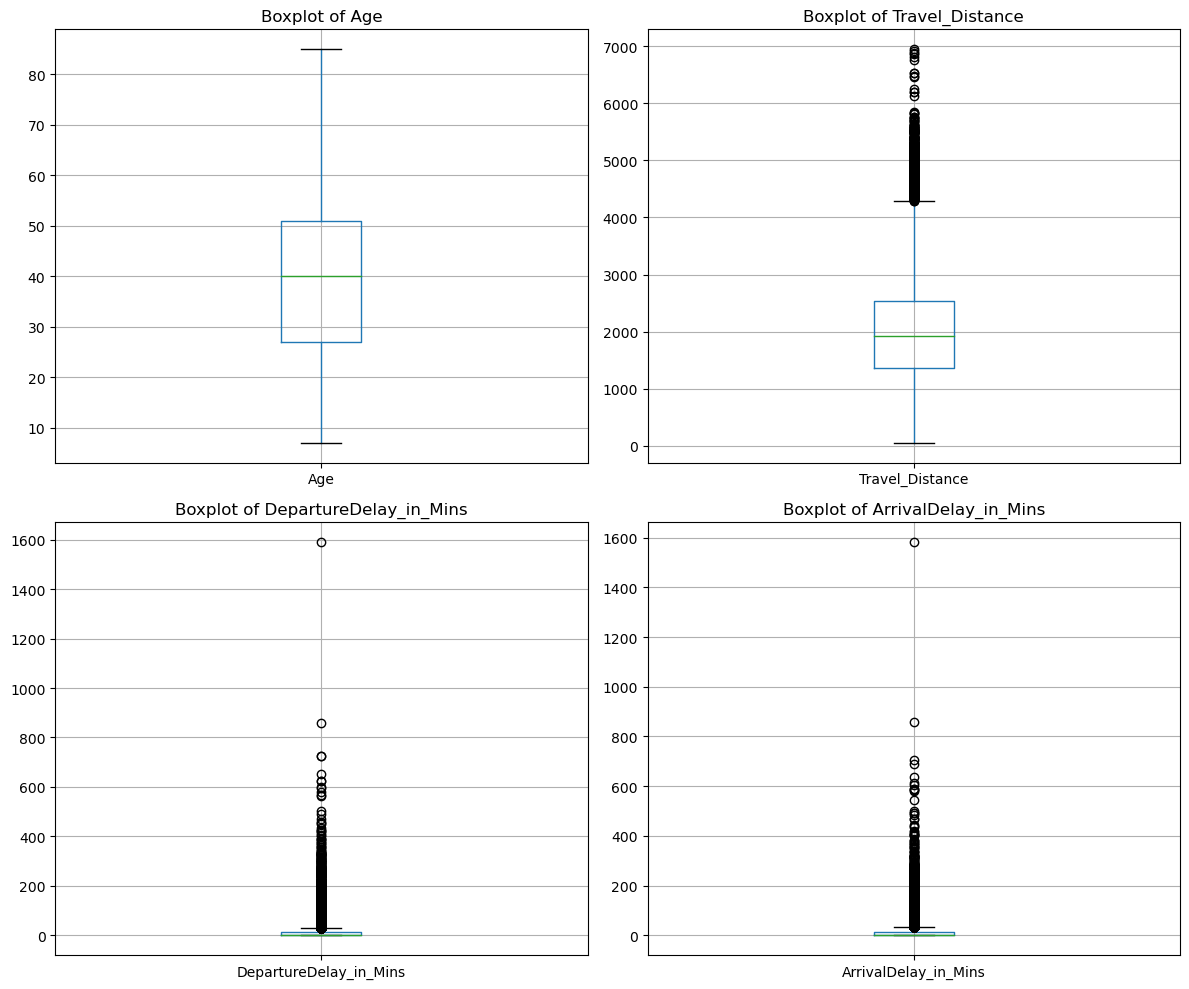

In [12]:
# Select Numeric Features
numeric_df = df.select_dtypes(include=['number'])
numeric_df.drop(columns=['ID','Overall_Experience'],inplace=True)
numeric_df

numeric_features = numeric_df.columns.tolist()

# Calculate the number of rows and columns needed
num_cols = 2
num_rows = (len(numeric_features) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows*5))

# Flatten the axes if necessary
if num_rows > 1:
    axes = axes.flatten()

# Plot boxplots for each numeric feature
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    numeric_df.boxplot(column=feature, ax=ax)
    ax.set_title(f'Boxplot of {feature}')

# Remove empty subplots if needed
for j in range(len(numeric_features), num_cols*num_rows):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

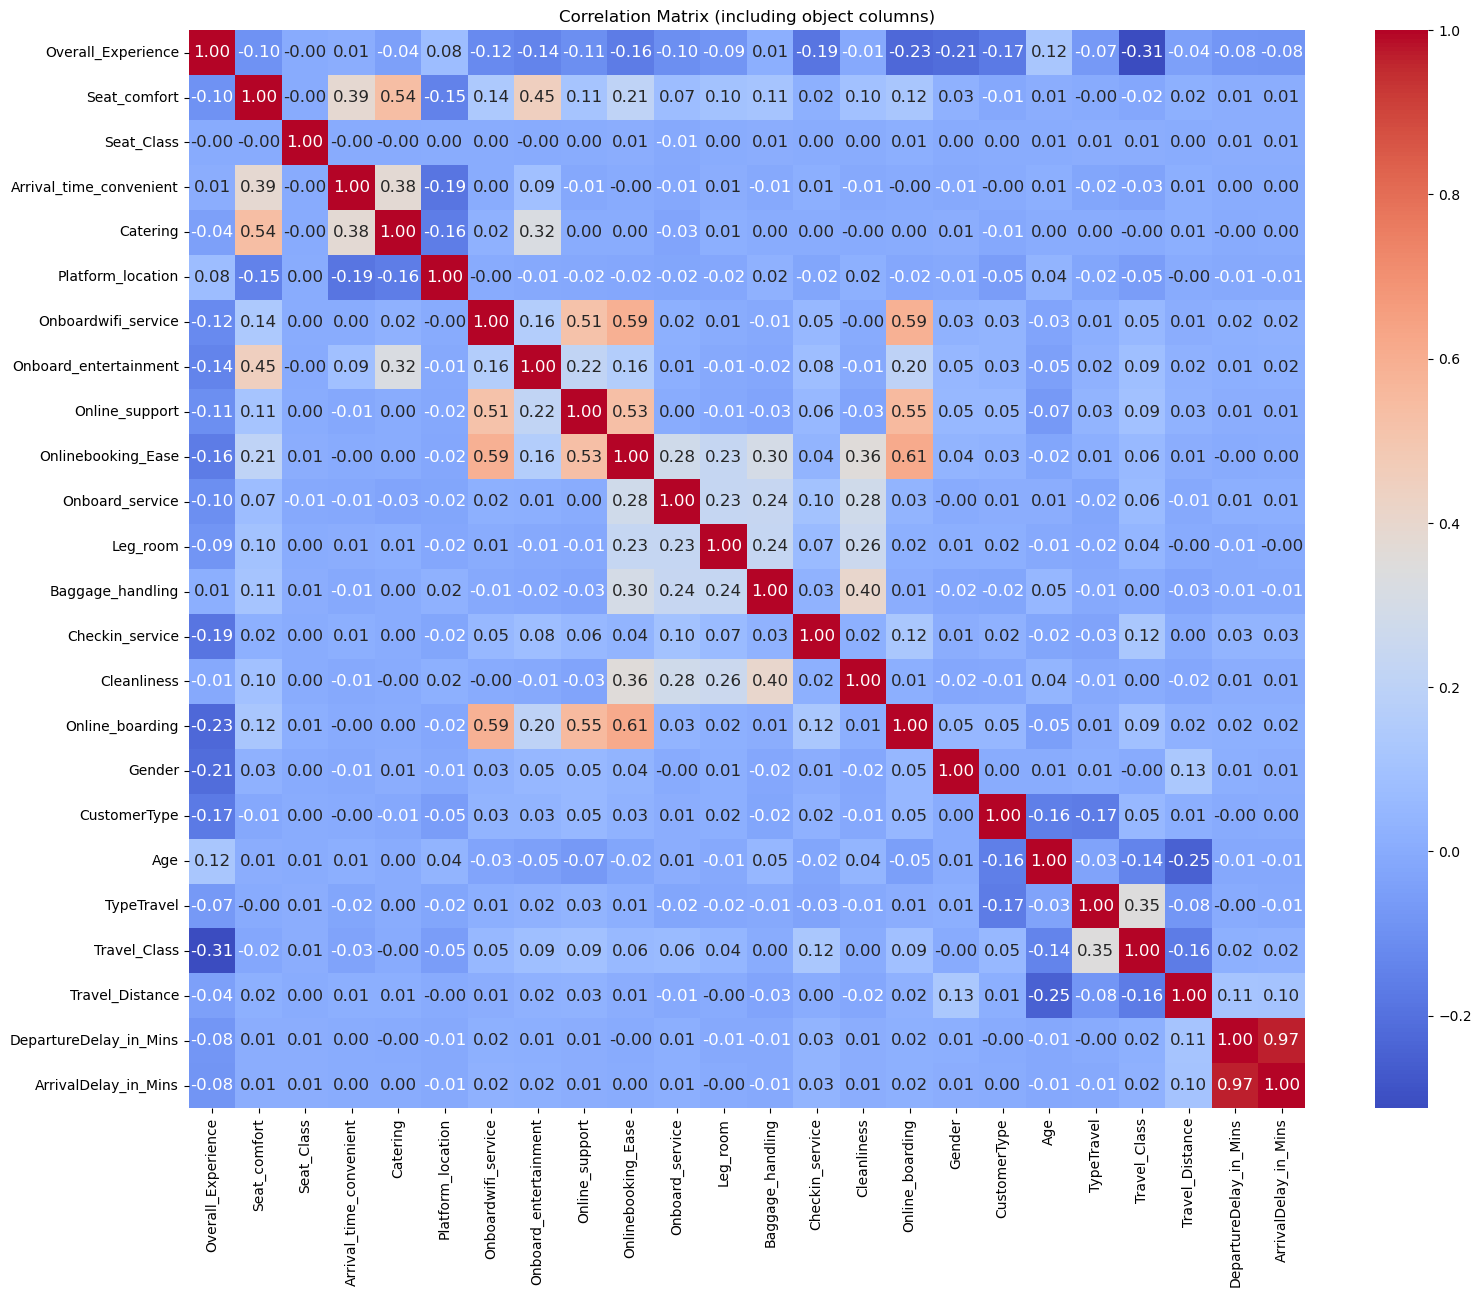

In [13]:
# Copy df
df_encoded = df.drop(columns=['ID']).copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode Object Cols
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Correlation Matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Matrix (including object columns)')
plt.show()

## Data PreProcessing
1. Drop Useless Features - Reduce Data Volume
2. Remove or Replace Null Values - Data Dimensionality 
3. Remove Outliers and Noisy Data
4. Feature Engineering  
5. Normalisation and Transformation
6. Feature Importance
7. Split Data to Subsets

In [14]:
# Remove ID as they are unique vals not needed
df = pd.read_csv("CSI_6_ARI_CW_23_24_22.csv")
final_df = df.drop(columns=['ID'])

In [15]:
# Cols With Null Values Initialisation
numeric_df = df.select_dtypes(include=['number'])

# Missing Values
for col in numeric_df:
    if numeric_df[col].isnull().sum() > 0:
        null_col = numeric_df[col].isnull().sum()
        print(f"Feature \033[1m'{col}'\033[0;0m has \033[1m{null_col}\033[0;0m null values")
print("\n\n")
        

# df with only Numeric Features that have Nulls
numeric_features_with_nulls = final_df[["Age", "DepartureDelay_in_Mins", "ArrivalDelay_in_Mins"]]

# Replace Nulls with the Mean of Feature
for col in numeric_features_with_nulls:
    final_df[col].fillna(final_df[col].mean(), inplace=True)
    
# Ensure Mean was applied
for col in numeric_features_with_nulls:
    if final_df[col].isnull().sum() > 0:
        null_col = final_df[col].isnull().sum()
        print(f"Feature \033[1m'{col}'\033[0;0m has \033[1m{null_col}\033[0;0m null values")
    else:
        print(f"\033[1m{col}\033[0;0m has no Null values")

Feature 'Age' has 9 null values
Feature 'DepartureDelay_in_Mins' has 19 null values
Feature 'ArrivalDelay_in_Mins' has 116 null values



Age has no Null values
DepartureDelay_in_Mins has no Null values
ArrivalDelay_in_Mins has no Null values


In [16]:
# Cols With Null Values Initialisation
object_df = df.select_dtypes(include=['O'])
obj_feat_list = []

# Missing Values
for col in object_df:
    if object_df[col].isnull().sum() > 0:
        obj_feat_list.append(col)
        null_col = object_df[col].isnull().sum()
        print(f"Feature \033[1m'{col}'\033[0;0m has \033[1m{null_col}\033[0;0m null values")
print("\n\n")
        
    
# df with only Object Features that have Nulls
obj_features_with_nulls = final_df[obj_feat_list]

# Replace Nulls with the Mode of Feature
for col in obj_features_with_nulls:
        final_df[col].fillna(final_df[col].mode()[0], inplace=True)
    
# Ensure Mode was applied
for col in obj_features_with_nulls:
    if final_df[col].isnull().sum() > 0:
        null_col = obj_features_with_nulls[col].isnull().sum()
        print(f"Feature \033[1m'{col}'\033[0;0m has \033[1m{null_col}\033[0;0m null values")
    else:
        print(f"\033[1m{col}\033[0;0m has no Null values")

Feature 'Seat_comfort' has 21 null values
Feature 'Arrival_time_convenient' has 2834 null values
Feature 'Catering' has 2738 null values
Feature 'Platform_location' has 11 null values
Feature 'Onboardwifi_service' has 11 null values
Feature 'Onboard_entertainment' has 5 null values
Feature 'Online_support' has 30 null values
Feature 'Onlinebooking_Ease' has 25 null values
Feature 'Onboard_service' has 2393 null values
Feature 'Leg_room' has 21 null values
Feature 'Baggage_handling' has 45 null values
Feature 'Checkin_service' has 30 null values
Feature 'Cleanliness' has 4 null values
Feature 'Online_boarding' has 4 null values
Feature 'Gender' has 28 null values
Feature 'CustomerType' has 2856 null values
Feature 'TypeTravel' has 2827 null values



Seat_comfort has no Null values
Arrival_time_convenient has no Null values
Catering has no Null values
Platform_location has no Null values
Onboardwifi_service has no Null values
Onboard_entertainment has no Null values
Online_support has n

In [17]:
# Before Dropping Outliers
print(len(df))

# Object Outliers
outlier_columns = ['Onboardwifi_service', 'Onlinebooking_Ease', 'Onboard_service', 'Cleanliness', 'Online_boarding', 'Leg_room']
# Drop rows where specified columns have 'extremely poor' values
final_df = final_df[~final_df[outlier_columns].isin(['extremely poor']).any(axis=1)]

# Numeric Outliers
final_df = final_df.loc[(final_df['ArrivalDelay_in_Mins'] <= 800) & (final_df['DepartureDelay_in_Mins'] <= 800)]

# After Dropping Outliers
print(len(final_df))

30000
29853


In [18]:
# Total Time in Mins
final_df['Total_Time_in_Mins'] = final_df['ArrivalDelay_in_Mins'] + final_df['DepartureDelay_in_Mins']
final_df.head(1)

,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,...,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Total_Time_in_Mins
0,0,good,Ordinary,good,good,manageable,need improvement,good,excellent,need improvement,...,need improvement,Female,Loyal Customer,38.0,Personal Travel,Eco,1426,42.0,29.0,71.0


In [19]:
final_df

,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,...,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Total_Time_in_Mins
0,0,good,Ordinary,good,good,manageable,need improvement,good,excellent,need improvement,...,need improvement,Female,Loyal Customer,38.0,Personal Travel,Eco,1426,42.0,29.0,71.0
1,0,need improvement,Green Car,acceptable,acceptable,manageable,excellent,good,acceptable,need improvement,...,acceptable,Female,Loyal Customer,56.0,Business travel,Eco,343,0.0,0.0,0.0
2,1,good,Ordinary,good,acceptable,manageable,excellent,good,excellent,excellent,...,excellent,Male,Loyal Customer,26.0,Personal Travel,Eco,1092,1.0,0.0,1.0
3,1,need improvement,Ordinary,need improvement,acceptable,need improvement,excellent,acceptable,poor,good,...,poor,Male,Loyal Customer,38.0,Business travel,Business,818,17.0,0.0,17.0
4,1,acceptable,Green Car,acceptable,acceptable,manageable,excellent,good,excellent,acceptable,...,good,Male,Loyal Customer,46.0,Business travel,Business,2114,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,acceptable,Ordinary,acceptable,acceptable,manageable,acceptable,good,excellent,excellent,...,acceptable,Female,Loyal Customer,16.0,Personal Travel,Eco,1836,3.0,0.0,3.0
29996,1,need improvement,Green Car,need improvement,poor,need improvement,poor,good,good,need improvement,...,good,Female,Loyal Customer,33.0,Personal Travel,Eco,4267,0.0,12.0,12.0
29997,1,acceptable,Green Car,need improvement,need improvement,Inconvinient,excellent,need improvement,acceptable,excellent,...,excellent,Male,Loyal Customer,38.0,Business travel,Business,1612,0.0,0.0,0.0
29998,0,acceptable,Green Car,good,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,...,acceptable,Male,Loyal Customer,54.0,Personal Travel,Eco,1748,0.0,13.0,13.0


In [20]:
# LabelEncoder
label_encoder = LabelEncoder()

# Iterate through Object Cols
for col in final_df.select_dtypes(include=['object']):
    label_encoder.fit(final_df[col])
    final_df[col] = label_encoder.transform(final_df[col])
    
final_df.head()

,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,...,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Total_Time_in_Mins
0,0,3,1,3,3,2,3,3,1,3,...,3,0,0,38.0,1,1,1426,42.0,29.0,71.0
1,0,4,0,0,0,2,1,3,0,3,...,0,0,0,56.0,0,1,343,0.0,0.0,0.0
2,1,3,1,3,0,2,1,3,1,1,...,1,1,0,26.0,1,1,1092,1.0,0.0,1.0
3,1,4,1,4,0,3,1,0,4,2,...,4,1,0,38.0,0,0,818,17.0,0.0,17.0
4,1,0,0,0,0,2,1,3,1,0,...,2,1,0,46.0,0,0,2114,2.0,0.0,2.0


In [21]:
# Normalisation MinMaxScaler
scaler = MinMaxScaler()

# Features to Normalise

cols_to_normalise = ['Age', 'Travel_Distance', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins', 'Total_Time_in_Mins']

# Apply MinMaxScaller
final_df[cols_to_normalise] = scaler.fit_transform(final_df[cols_to_normalise])

final_df.head()

,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,...,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Total_Time_in_Mins
0,0,3,1,3,3,2,3,3,1,3,...,3,0,0,0.397436,1,1,0.199420,0.064417,0.045455,0.055039
1,0,4,0,0,0,2,1,3,0,3,...,0,0,0,0.628205,0,1,0.042464,0.000000,0.000000,0.000000
2,1,3,1,3,0,2,1,3,1,1,...,1,1,0,0.243590,1,1,0.151014,0.001534,0.000000,0.000775
3,1,4,1,4,0,3,1,0,4,2,...,4,1,0,0.397436,0,0,0.111304,0.026074,0.000000,0.013178
4,1,0,0,0,0,2,1,3,1,0,...,2,1,0,0.500000,0,0,0.299130,0.003067,0.000000,0.001550


Onboard_entertainment: 0.1737
Seat_comfort: 0.1176
Onlinebooking_Ease: 0.0707
Travel_Class: 0.0526
Online_support: 0.0465
CustomerType: 0.0447
Travel_Distance: 0.0428
Online_boarding: 0.0407
Age: 0.0385
Gender: 0.035
Catering: 0.0349
Leg_room: 0.0341
Baggage_handling: 0.0312
Onboard_service: 0.0298
Arrival_time_convenient: 0.0292
Checkin_service: 0.0288
Cleanliness: 0.0271
TypeTravel: 0.0269
Platform_location: 0.0218
Total_Time_in_Mins: 0.0186
Onboardwifi_service: 0.0171
ArrivalDelay_in_Mins: 0.0166
DepartureDelay_in_Mins: 0.0154
Seat_Class: 0.0058


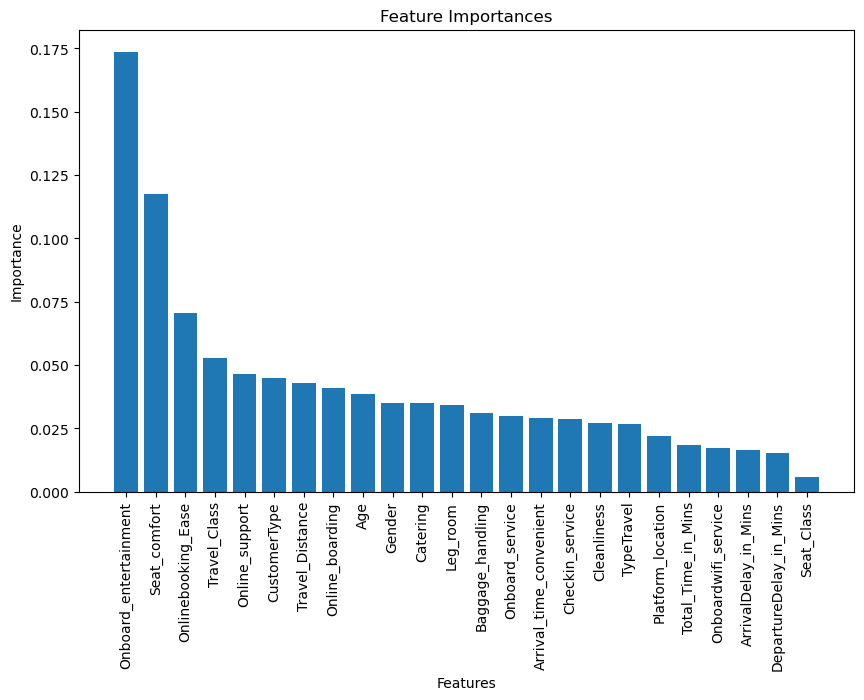

In [22]:
# Initialisation of RF Classifier Model
rf = RandomForestClassifier()

# Features
X_train = final_df.drop(columns=['Overall_Experience']) 
# Target
y_train = final_df['Overall_Experience']  

# Fit the Model
rf.fit(X_train, y_train)

# Get Feature Importance
importances = rf.feature_importances_
# Zip feature names and importances
feature_importance_pairs = zip(X_train.columns, importances)
# Sort feature-importance pairs by importance in descending order
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)
# Unzip sorted pairs
sorted_features, sorted_importances = zip(*sorted_feature_importance_pairs)

# Print feature importances
for feature, importance in zip(sorted_features, sorted_importances):
    print(f"\033[1m{feature}\033[0;0m: {round(importance, 4)}")


# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), sorted_importances, align='center')
plt.xticks(range(X_train.shape[1]), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

Onboard_entertainment: 0.1634
Seat_comfort: 0.1157
Onlinebooking_Ease: 0.0703
Online_support: 0.0523
CustomerType: 0.0485
Travel_Class: 0.0449
Travel_Distance: 0.0437
Online_boarding: 0.0419
Gender: 0.0386
Age: 0.0386
Catering: 0.0363
Leg_room: 0.0335
Baggage_handling: 0.0302
Onboard_service: 0.0297
TypeTravel: 0.0294
Checkin_service: 0.0289
Arrival_time_convenient: 0.0289
Cleanliness: 0.0278
Platform_location: 0.0219
Total_Time_in_Mins: 0.0192
Onboardwifi_service: 0.018
ArrivalDelay_in_Mins: 0.017
DepartureDelay_in_Mins: 0.0155
Seat_Class: 0.0058


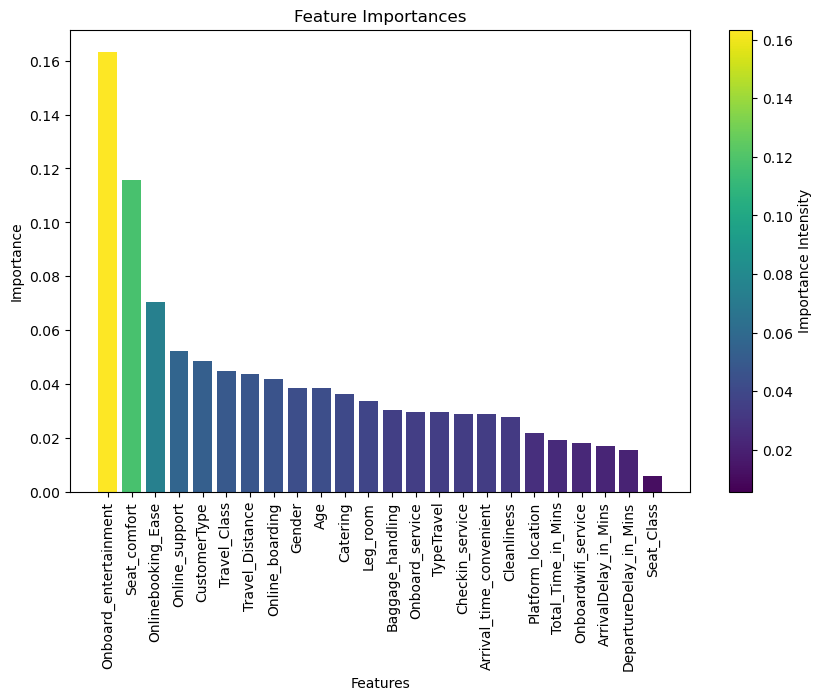

In [185]:
# RF Model
rf = RandomForestClassifier()
# Features
X_train = final_df.drop(columns=['Overall_Experience']) 
# Target
y_train = final_df['Overall_Experience']  
# Fit the Model
rf.fit(X_train, y_train)

# Get Feature Importance
importances = rf.feature_importances_
# Zip feature names and importances
feature_importance_pairs = zip(X_train.columns, importances)
# Sort feature-importance pairs by importance in descending order
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)
# Unzip sorted pairs
sorted_features, sorted_importances = zip(*sorted_feature_importance_pairs)

# Print feature importances
for feature, importance in zip(sorted_features, sorted_importances):
    print(f"\033[1m{feature}\033[0;0m: {round(importance, 4)}")


# Colormap
colors = plt.cm.viridis(np.array(sorted_importances) / max(sorted_importances))  # Using the Viridis colormap with scaled importances
# Bar Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(range(X_train.shape[1]), sorted_importances, align='center', color=colors)
plt.xticks(range(X_train.shape[1]), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')

# Color Bars
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(sorted_importances), vmax=max(sorted_importances)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Importance Intensity')

plt.show()

In [23]:
# Filter out features with importance below 0.0175
important_features = [feature for feature, importance in sorted_feature_importance_pairs if importance >= 0.0175]

# Keeping Most Important Features
features = final_df[important_features]
# Target
target = final_df['Overall_Experience']

# Training & Temp Testing
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42)
# Validation & Testing
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Remaining Features
print("Number of retained features after filtering:", len(features.columns))
# Train, Validate & Test size
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_valid.shape[0])
print("Test set size:", X_test.shape[0])

Number of retained features after filtering: 20
Training set size: 20897
Validation set size: 4478
Test set size: 4478


## Model Development
1. Decision Trees
2. Random Forests
3. Stochastic Gradient Descent
4. Ada Boost
5. Radial Basis Function Support Vector Machine (RBF SVM)

In [24]:
from sklearn.metrics import make_scorer

In [107]:
# Scoring with make_scorer
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'roc_auc': make_scorer(roc_auc_score)
}

In [108]:
# Reusables

# Training & Temp Testing
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42)
# Validation & Testing
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define scoring functions mapping
scoring_function = {
    'accuracy': accuracy_score,
    'f1_macro': f1_score,
    'precision_macro': precision_score,
    'roc_auc': roc_auc_score
    }

# Predictions
def prediction_valid_test(X_valid, X_test):
    y_valid_pred = grid_search.predict(X_valid)
    y_test_pred = grid_search.predict(X_test)
    return y_valid_pred, y_test_pred

# Display KPIs Scores 
def display_KPIs(y_valid, y_valid_pred, y_test, y_test_pred):
    accuracy_of_clf = 0
    # Accuracy, F1 score, Precision, & ROC AUC for Val data
    print("Validation Data:")
    for metric_name, scoring_func in scoring.items():
        score = scoring_function[metric_name](y_valid, y_valid_pred)
        print(f"{metric_name}: {score:.2f}")
        if metric_name == 'accuracy':
            accuracy_of_clf = round(score,2)

    # Accuracy, F1 score, Precision, & ROC AUC for Test data
    print("\nTesting Data:")
    for metric_name, scoring_func in scoring.items():
        score = scoring_function[metric_name](y_test, y_test_pred)
        print(f"{metric_name}: {score:.2f}")
        if metric_name == 'accuracy':
            accuracy_of_clf += round(score,2)
    
    val_test_acc = accuracy_of_clf / 2
    
    return val_test_acc

In [138]:
# Model
dt_clf = DecisionTreeClassifier()

# Parameters to Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(0,21,5)),
    'min_samples_leaf': list(range(0,5)),
    'min_samples_split': [2, 5, 10],
    }

# GridSearchCV for best Params
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, scoring=scoring, refit='accuracy')
# Fit GridSearchCV to Train data
grid_search.fit(X_train, y_train)
# Display best parameters
print("Best Parameters:", grid_search.best_params_)

# Predictions on Val & Test data
y_valid_pred, y_test_pred = prediction_valid_test(X_valid, X_test)

# Get KPI Scores
dt_accuracy = display_KPIs(y_valid, y_valid_pred, y_test, y_test_pred)
print("Accuracy of the DecisionTree classifier: ", dt_accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}
Validation Data:
accuracy: 0.92
f1_macro: 0.93
precision_macro: 0.93
roc_auc: 0.92

Testing Data:
accuracy: 0.92
f1_macro: 0.92
precision_macro: 0.92
roc_auc: 0.92
Accuracy of the DecisionTree classifier:  0.92


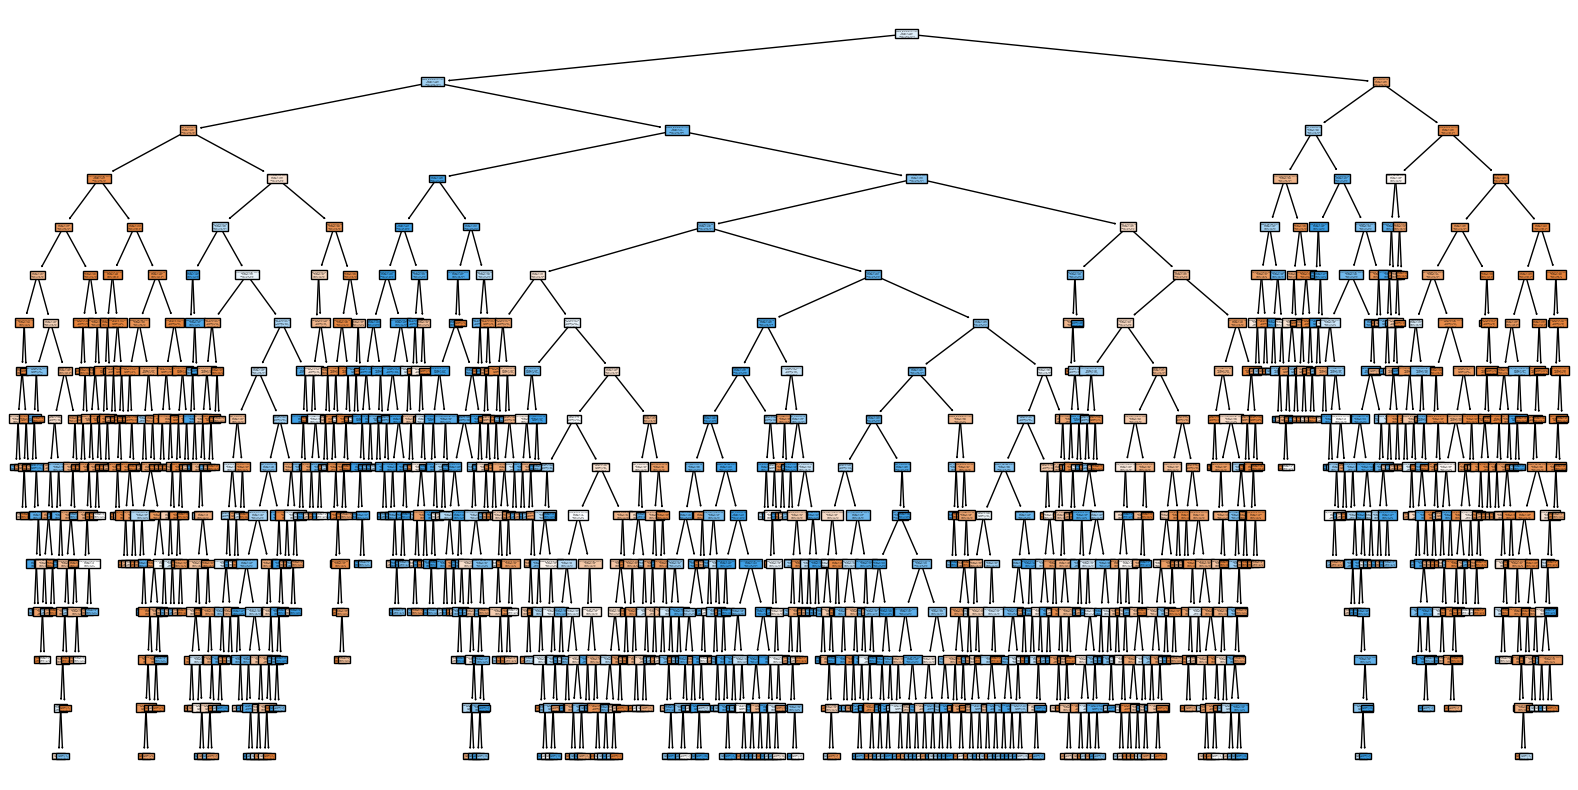

In [140]:
# Access the best estimator found by grid search
best_dt_clf = grid_search.best_estimator_

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt_clf, filled=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'])
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

# Set colors for bars, making the most important feature bold
colors = ['skyblue' if feature != most_important_feature else 'orange' for feature in sorted_features]

plt.bar(range(X_train.shape[1]), sorted_importances, align='center', color=colors)
plt.xticks(range(X_train.shape[1]), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [110]:
# Model
rf_clf = RandomForestClassifier()

# Params to Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 4]
    }

# GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring=scoring, refit='accuracy')
# Fit GridSearchCV to Train data
grid_search.fit(X_train, y_train)
# Best Params
print("Best Parameters:", grid_search.best_params_)

# Predictions on Val & Test data
y_valid_pred, y_test_pred = prediction_valid_test(X_valid, X_test)

# Get KPI Scores
rf_accuracy = display_KPIs(y_valid, y_valid_pred, y_test, y_test_pred)
print("Accuracy of the classifier:", rf_accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Validation Data:
accuracy: 0.95
f1_macro: 0.95
precision_macro: 0.95
roc_auc: 0.95

Testing Data:
accuracy: 0.94
f1_macro: 0.94
precision_macro: 0.94
roc_auc: 0.94
Accuracy of the classifier: 0.945


In [114]:
# Model
sgd_clf = SGDClassifier()

# Params
param_grid = {
    'loss': ['hinge', 'log', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-3, 1e-4]
    }

# GridSearchCV
grid_search = GridSearchCV(estimator=sgd_clf, param_grid=param_grid, cv=5, scoring=scoring, refit='accuracy')
# Fit GridSearchCV to Train data
grid_search.fit(X_train, y_train)
# Best Params
print("Best Parameters:", grid_search.best_params_)

# Predictions on Val & Test data
y_valid_pred, y_test_pred = prediction_valid_test(X_valid, X_test)

# Get KPI Scores
sgd_accuracy = display_KPIs(y_valid, y_valid_pred, y_test, y_test_pred)
print("Accuracy of the classifier:", sgd_accuracy)

Best Parameters: {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'elasticnet', 'tol': 0.0001}
Validation Data:
accuracy: 0.75
f1_macro: 0.78
precision_macro: 0.75
roc_auc: 0.75

Testing Data:
accuracy: 0.76
f1_macro: 0.78
precision_macro: 0.75
roc_auc: 0.75
Accuracy of the classifier: 0.755


In [116]:
# Model
ada_boost_clf = AdaBoostClassifier()

# Params
param_grid = {
    'n_estimators': [50, 100, 150], 
    'learning_rate': [0.1, 0.5, 1.0, 1.5],  
    'base_estimator': [None, DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
    }

# GridSearchCV
grid_search = GridSearchCV(estimator=ada_boost_clf, param_grid=param_grid, cv=5, scoring=scoring, refit='accuracy')
grid_search.fit(X_train, y_train)
# Best Params
print("Best Parameters:", grid_search.best_params_)

# Predictions on Val & Test data
y_valid_pred, y_test_pred = prediction_valid_test(X_valid, X_test)

# Get KPI Scores
ada_accuracy = display_KPIs(y_valid, y_valid_pred, y_test, y_test_pred)
print("Accuracy of the classifier:", ada_accuracy)

Best Parameters: {'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.5, 'n_estimators': 150}
Validation Data:
accuracy: 0.93
f1_macro: 0.94
precision_macro: 0.93
roc_auc: 0.93

Testing Data:
accuracy: 0.93
f1_macro: 0.93
precision_macro: 0.93
roc_auc: 0.93
Accuracy of the classifier: 0.93


In [121]:
# Model
rbf_svm_clf = SVC()

# Params
param_grid = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 2],     
    'gamma': ['scale', 'auto', 1], 
    }

# GridSearchCV
grid_search = GridSearchCV(estimator=rbf_svm_clf, param_grid=param_grid, cv=5, scoring=scoring, refit='accuracy')
grid_search.fit(X_train, y_train)
# Best Params
print("Best Parameters:", grid_search.best_params_)

# Predictions on Val & Test data
y_valid_pred, y_test_pred = prediction_valid_test(X_valid, X_test)

# Get KPI Scores
rbf_accuracy = display_KPIs(y_valid, y_valid_pred, y_test, y_test_pred)
print("Accuracy of the classifier:", rbf_accuracy)

Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Validation Data:
accuracy: 0.92
f1_macro: 0.93
precision_macro: 0.93
roc_auc: 0.92

Testing Data:
accuracy: 0.92
f1_macro: 0.93
precision_macro: 0.92
roc_auc: 0.92
Accuracy of the classifier: 0.92


## Evaluation and Comparison

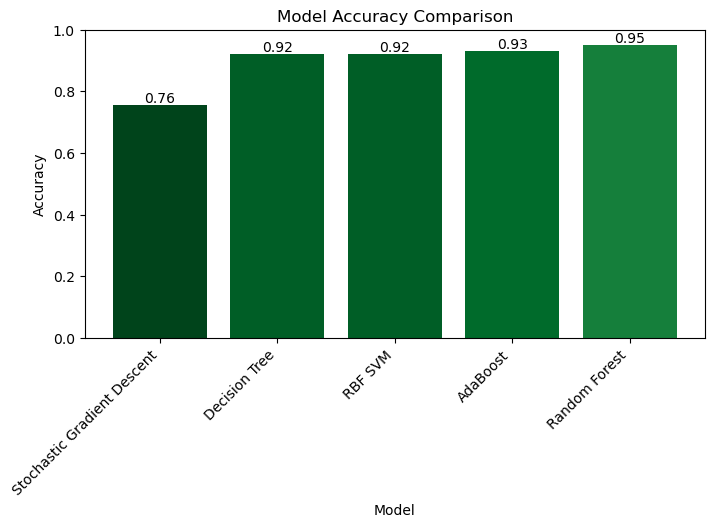

In [189]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Scale accuracy values from 0.75 to 1
scaled_accuracies = [(accuracy - 0.90) / 0.25 for accuracy in sorted_accuracies]
scaled_accuracies = np.clip(scaled_accuracies, 0, 1)  # Clip values to ensure they are within the range [0, 1]

# Create bar plot with darker blue colors
plt.figure(figsize=(8, 4))
bars = plt.bar(sorted_models, sorted_accuracies, color=plt.cm.Greens_r(scaled_accuracies))  # Using Blues_r colormap for darker colors
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')

# Add values on top of each bar
for bar, accuracy in zip(bars, sorted_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{accuracy:.2f}', ha='center')

plt.show()


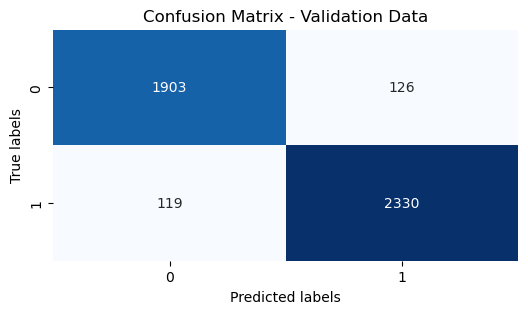

In [196]:
# Confusion Matrix for RF Validation
conf_matrix_valid = confusion_matrix(y_valid, y_valid_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix_valid, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix - Validation Data')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

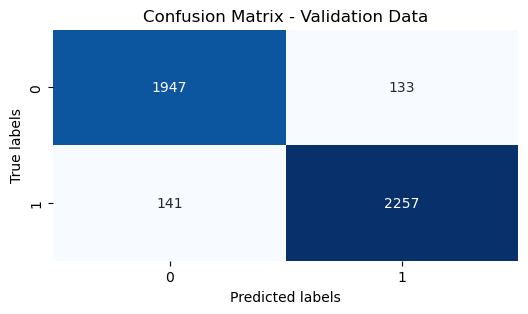

In [197]:
# Confusion Matrix for RF Testing Data
conf_matrix_valid = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix_valid, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix - Validation Data')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [195]:
# RF Classification Report Validation Data
print(classification_report(y_valid, y_valid_pred))
# RF Classification Report Testing Date
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2029
           1       0.95      0.95      0.95      2449

    accuracy                           0.95      4478
   macro avg       0.94      0.94      0.94      4478
weighted avg       0.95      0.95      0.95      4478

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2080
           1       0.94      0.94      0.94      2398

    accuracy                           0.94      4478
   macro avg       0.94      0.94      0.94      4478
weighted avg       0.94      0.94      0.94      4478

